In [73]:
with open("attention_results/20240529_023233_attention.txt", "r") as file:
    contents = file.read()
    print(contents)

Generated token index: 0, decoder element 0 shape: torch.Size([1, 32, 769, 769])
Generated token index: 0, decoder element 1 shape: torch.Size([1, 32, 769, 769])
Generated token index: 0, decoder element 2 shape: torch.Size([1, 32, 769, 769])
Generated token index: 0, decoder element 3 shape: torch.Size([1, 32, 769, 769])
Generated token index: 0, decoder element 4 shape: torch.Size([1, 32, 769, 769])
Generated token index: 0, decoder element 5 shape: torch.Size([1, 32, 769, 769])
Generated token index: 0, decoder element 6 shape: torch.Size([1, 32, 769, 769])
Generated token index: 0, decoder element 7 shape: torch.Size([1, 32, 769, 769])
Generated token index: 0, decoder element 8 shape: torch.Size([1, 32, 769, 769])
Generated token index: 0, decoder element 9 shape: torch.Size([1, 32, 769, 769])
Generated token index: 0, decoder element 10 shape: torch.Size([1, 32, 769, 769])
Generated token index: 0, decoder element 11 shape: torch.Size([1, 32, 769, 769])
Generated token index: 0, 

In [74]:
import json

with open("attention_results/20240529_023233_attention_weights.json", "r") as file:
    attention_description = json.load(file)

    # Remove the 'attention_description' key if it exists
    if 'attention_description' in attention_description:
        del attention_description['attention_description']

    # Display the content of the JSON file nicely
    import pprint

    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(attention_description)


{   'all_tokens': [   'A',
                      'Ġchat',
                      'Ġbetween',
                      'Ġa',
                      'Ġcurious',
                      'Ġhuman',
                      'Ġand',
                      'Ġan',
                      'Ġartificial',
                      'Ġintelligence',
                      'Ġassistant',
                      '.',
                      'ĠThe',
                      'Ġassistant',
                      'Ġgives',
                      'Ġhelpful',
                      ',',
                      'Ġdetailed',
                      ',',
                      'Ġand',
                      'Ġpolite',
                      'Ġanswers',
                      'Ġto',
                      'Ġthe',
                      'Ġhuman',
                      "'s",
                      'Ġquestions',
                      '.',
                      '###',
                      'Human',
                      ':',
                      'Ġ',
  

In [75]:
# Print the length of all tokens
all_tokens = attention_description.get("all_tokens", [])
print(f"Length of all tokens: {len(all_tokens)}")


Length of all tokens: 870


In [76]:
import torch

# Load the attention results from the specified file
attention_results_path = "attention_results/main_attentions.pt"
attentions = torch.load(attention_results_path, map_location=torch.device('cpu'))

# Print the loaded attentions to verify
print(attentions)


((tensor([[[[1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [5.6274e-02, 9.4385e-01, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [2.1011e-02, 2.3132e-01, 7.4756e-01,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [9.1791e-06, 5.9605e-08, 8.9407e-07,  ..., 4.0100e-02,
           0.0000e+00, 0.0000e+00],
          [1.2913e-03, 5.7817e-05, 5.4955e-05,  ..., 8.7036e-02,
           2.1680e-01, 0.0000e+00],
          [6.9439e-05, 2.9802e-06, 5.1856e-06,  ..., 1.4526e-01,
           1.0486e-01, 3.2227e-01]],

         [[1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [1.9604e-01, 8.0371e-01, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [1.4038e-02, 8.9941e-01, 8.6304e-02,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [1.5898e-03, 3.6502e-04, 2.9564e-04,  ..., 5.60

In [77]:
import numpy as np

decoder_no = 0
attention_head = 0

final_size = attentions[-1][decoder_no][0,attention_head,:].shape[1]
attention_matrix = np.zeros((final_size, final_size))

first_matrix = np.array(attentions[0][decoder_no][0,attention_head,:])
first_matrix_height = first_matrix.shape[0]

# Insert the first_matrix into the top left corner of attention_matrix
attention_matrix[:first_matrix.shape[0], :first_matrix.shape[1]] = first_matrix


for generated_token_index, attention in enumerate(attentions[1:], start=0):
    new_token_row = np.array(attention[decoder_no][0, attention_head, :])
    new_token_row = np.pad(new_token_row, ((0, 0), (0, final_size - new_token_row.shape[1])), 'constant')

    attention_matrix[first_matrix_height + generated_token_index] = new_token_row

    # Select only the first batch and the first attention head
    # output_text = f"Generated token index: {generated_token_index}, decoder element 0 shape: {decoder_element.shape}"
    # decoder_element_np = decoder_element.numpy()
    
    # print(output_text)

is_lower_triangular = np.allclose(attention_matrix, np.tril(attention_matrix))
print(f"Is this a lower triangular matrix? {is_lower_triangular}")


Is this a lower triangular matrix? True


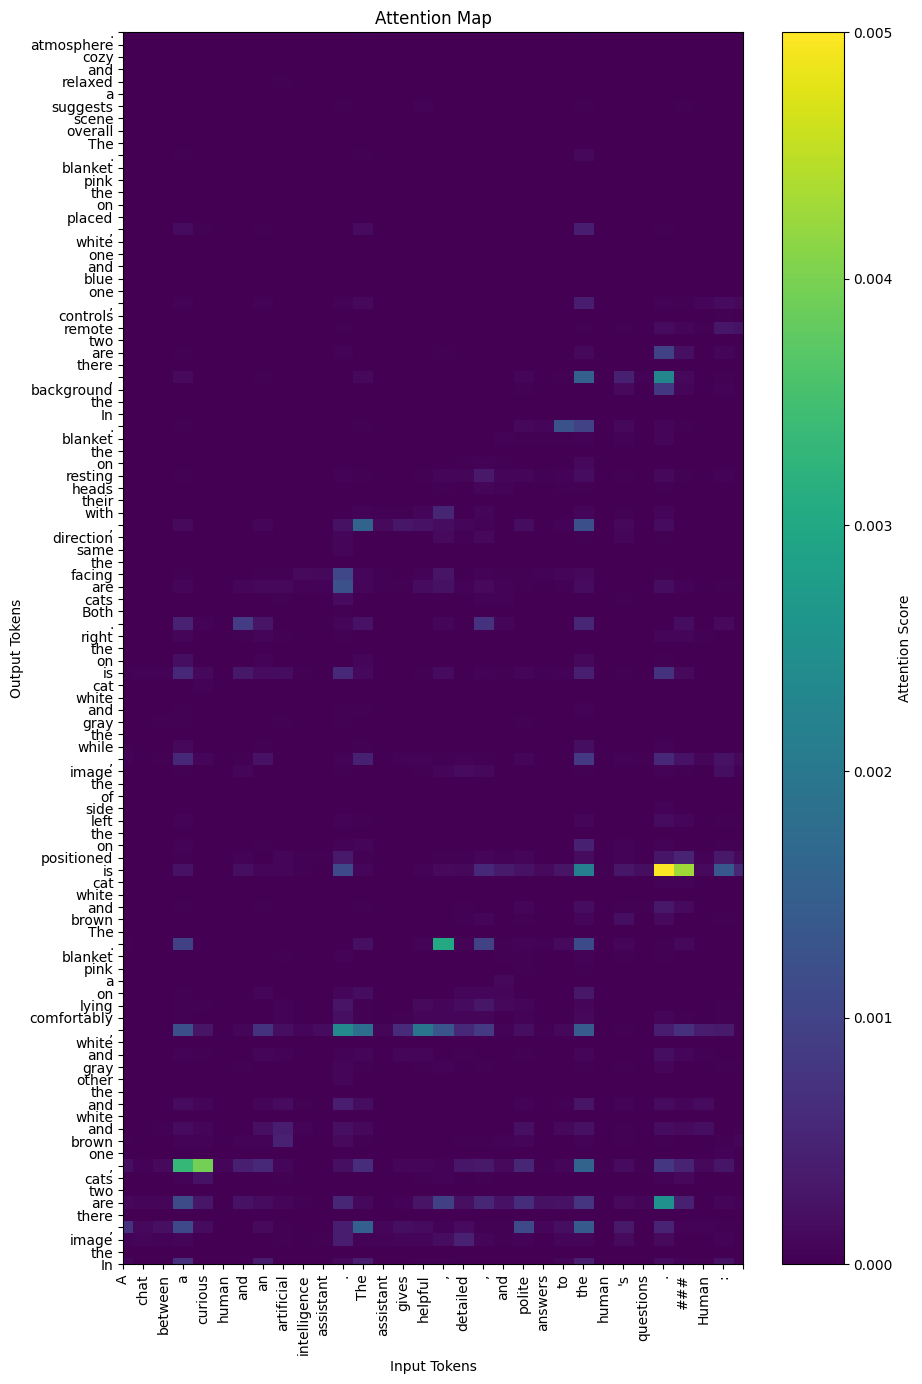

In [100]:
import matplotlib.pyplot as plt

# Visualize the attention matrix on a smaller scale
plt.figure(figsize=(10, 16))  # Increase the height of the figure
plt.imshow(attention_matrix, cmap='viridis', aspect='auto', vmin=0, vmax=0.005)
plt.colorbar(label='Attention Score')

# Set the labels for the x and y axes using attention_description["all_tokens"]
tokens = [token.replace('Ġ', '').replace('Ċ', '') for token in attention_description["all_tokens"]]
plt.xticks(ticks=np.arange(len(tokens)), labels=tokens, rotation=90)
plt.yticks(ticks=np.arange(len(tokens)), labels=tokens)

# Find the start and end index of tokens with prefix "image_"
image_token_indices = [i for i, token in enumerate(tokens) if token.startswith("image_")]
if image_token_indices:
    xlim_start = image_token_indices[0]
    xlim_end = image_token_indices[-1]
else:
    xlim_start = 0
    xlim_end = len(tokens) - 1

plt.ylabel('Output Tokens')
plt.xlabel('Input Tokens')
plt.title('Attention Map')
plt.ylim(769, len(tokens)-1)  # Limit the y-axis to 770 to 882
plt.xlim(0, xlim_start - 1)  # Limit the x-axis to the range of tokens before the image tokens
# plt.xlim(xlim_end + 1, 769)  # Limit the x-axis to the range of tokens after the image tokens
plt.show()




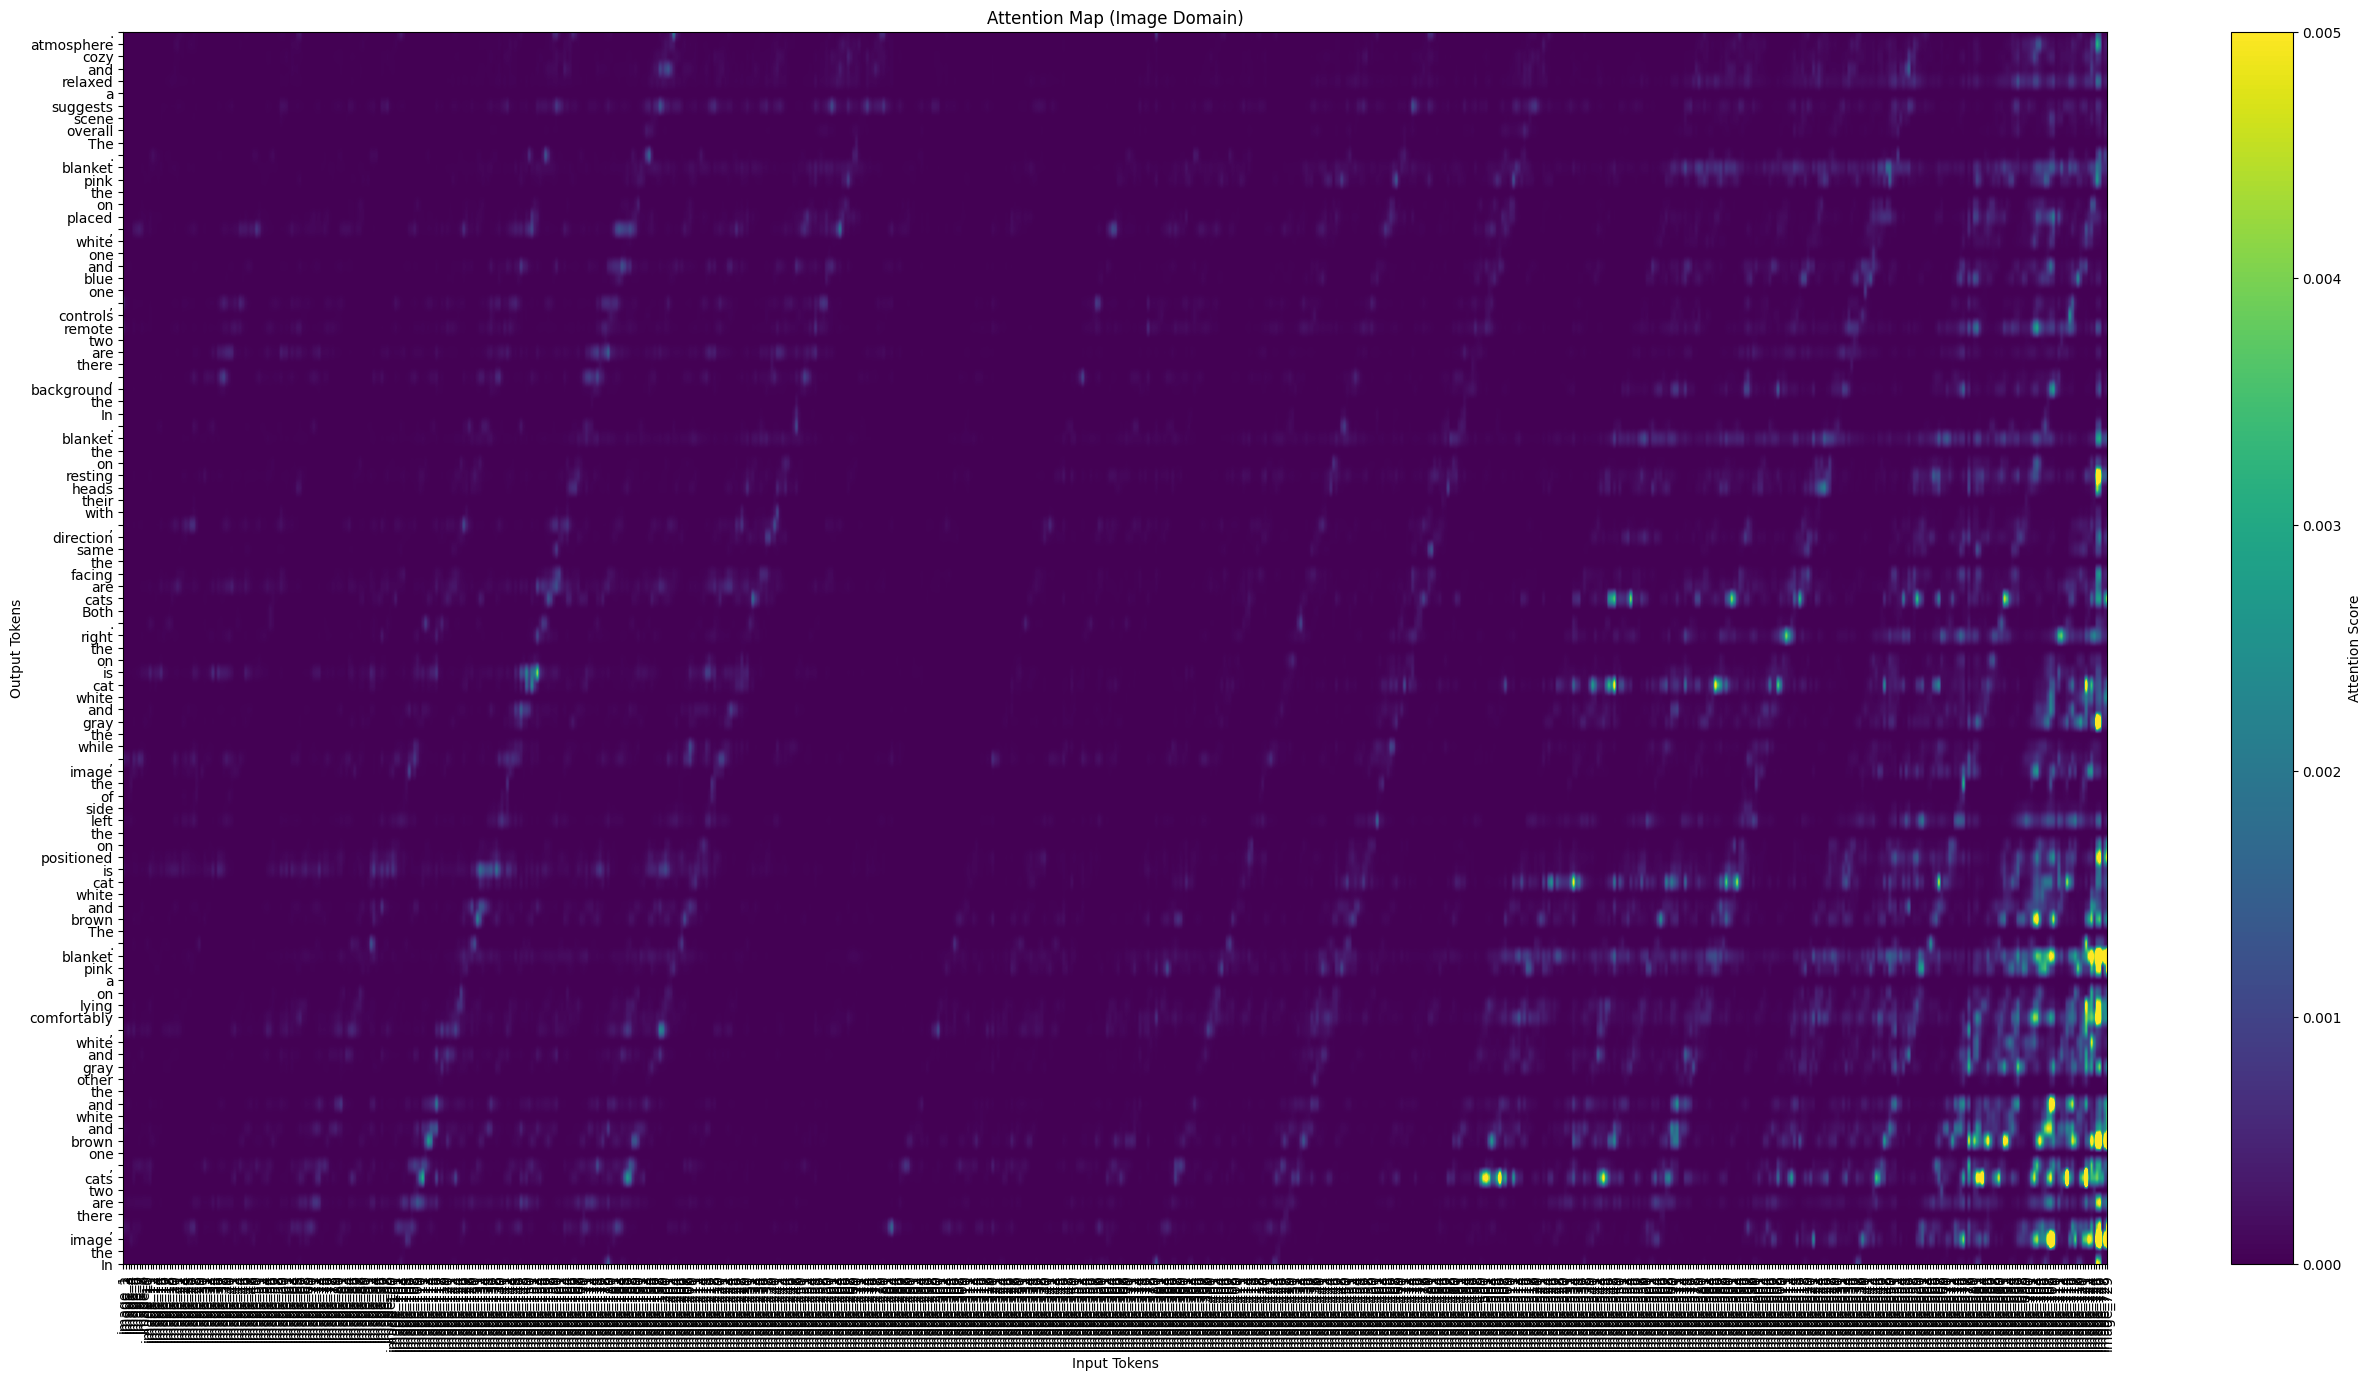

In [92]:
# Plot a second graph, and limit x to JUST the image domain
plt.figure(figsize=(32, 16))  # Increase the height of the figure
plt.imshow(attention_matrix, cmap='viridis', aspect='auto', vmin=0, vmax=0.005)
plt.colorbar(label='Attention Score')

# Set the labels for the x and y axes using attention_description["all_tokens"]
plt.xticks(ticks=np.arange(len(tokens)), labels=tokens, rotation=90)
plt.yticks(ticks=np.arange(len(tokens)), labels=tokens)

# Limit the x-axis to JUST the image domain
if image_token_indices:
    xlim_start = image_token_indices[0]
    xlim_end = image_token_indices[-1]
    plt.xlim(xlim_start, xlim_end)
else:
    plt.xlim(0, 0)  # If no image tokens, set x limits to 0

plt.ylabel('Output Tokens')
plt.xlabel('Input Tokens')
plt.title('Attention Map (Image Domain)')
plt.ylim(769, len(tokens)-1)  # Limit the y-axis to 770 to 882
plt.show()

In [126]:
import requests
from PIL import Image, ImageDraw
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

# Extract the 7th row from the attention matrix
idx = 7
print(attention_description["outputs"])
print(attention_description['output_tokens'][idx].replace('Ġ', ' ').replace('Ċ', ''))
seventh_row = attention_matrix[768 + idx, :]

# Get the columns in the matrix (xlim_start, xlim_end) for the 7th row
xlim_start = image_token_indices[0]
xlim_end = image_token_indices[-1]
selected_columns = seventh_row[xlim_start:xlim_end+1]

# Print the selected columns for verification
# print("Selected columns for the 7th row:", selected_columns)
print(len(selected_columns))

# Load the image from the URL
image_url = "http://images.cocodataset.org/val2017/000000039769.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# Scale the image to 384 x 384
scaled_image = image.resize((384, 384))

# Create 27 x 27 patches
patch_size = 384 // 27

# Create a new image to draw patches on
patched_image = scaled_image.copy()
draw = ImageDraw.Draw(patched_image, "RGBA")

# Ensure selected_columns is reshaped to 27x27
selected_columns_reshaped = np.reshape(selected_columns, (27, 27))

for i in range(27):
    for j in range(27):
        x0 = j * patch_size
        y0 = i * patch_size
        x1 = x0 + patch_size
        y1 = y0 + patch_size
        # Normalize the opacity to be between 0 and 1
        opacity = selected_columns_reshaped[i, j] / 0.005
        draw.rectangle([x0, y0, x1, y1], fill=(0, 0, 255, int(255 * opacity)))

# Display the patched image
plt.figure(figsize=(8, 8))
plt.imshow(patched_image)
plt.axis('off')
plt.title('Scaled Image with 27x27 Patches (384 x 384)')
plt.show()

